**Netflix Userbase - Exploratory Data Analysis**
Data Source: Kaggle DataSets - https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset

Project goal: Exploratory data analysis on a snapshop of Netflix's userbase regarding demographics, usage trends and business impact. The data is synthetically generated.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
from datetime import date
init_notebook_mode(connected=True) 
%matplotlib inline

In [11]:
data_raw = pd.read_csv('Netflix Userbase.csv')
#create a copy of the raw data
df= data_raw

In [12]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [13]:
print(df.info())
print('-'*100)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None
----------------------------------------------------------------------------------------------------
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1

In [14]:
df['User ID'].nunique()

2500

**Part 1: Who are the consumers?**

A look at a few demographic aspects of the Netflix userbase:
Where the customers come from?
Is the userbase predominantly comprised of men or women? 
How old are the customers?

In [15]:
df_users = df.groupby('Country', as_index =False).agg({'User ID': 'count'})

fig_world = px.choropleth(df_users, locations='Country', locationmode='country names', color_continuous_scale = 'sunsetdark',  color='User ID', title='Netflix userbase countries')
fig_world.layout.coloraxis.colorbar.title = 'Number of users'
fig_world.show()

<Axes: title={'center': 'Distribution of Netflix users per Gender'}, xlabel='Gender', ylabel='Count'>

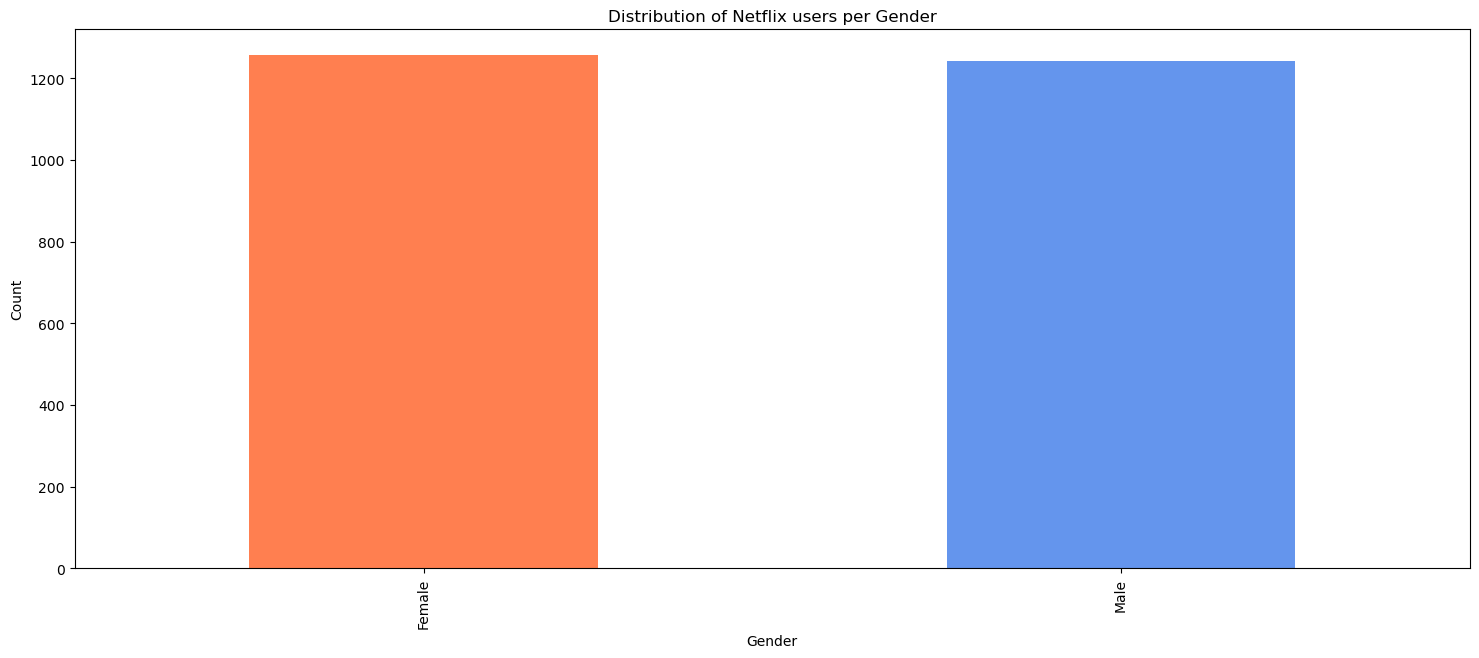

In [16]:
df['Gender'].value_counts().plot(kind='bar', title ='Distribution of Netflix users per Gender', xlabel='Gender', ylabel='Count', color=['coral', 'cornflowerblue'],figsize = (18, 7))

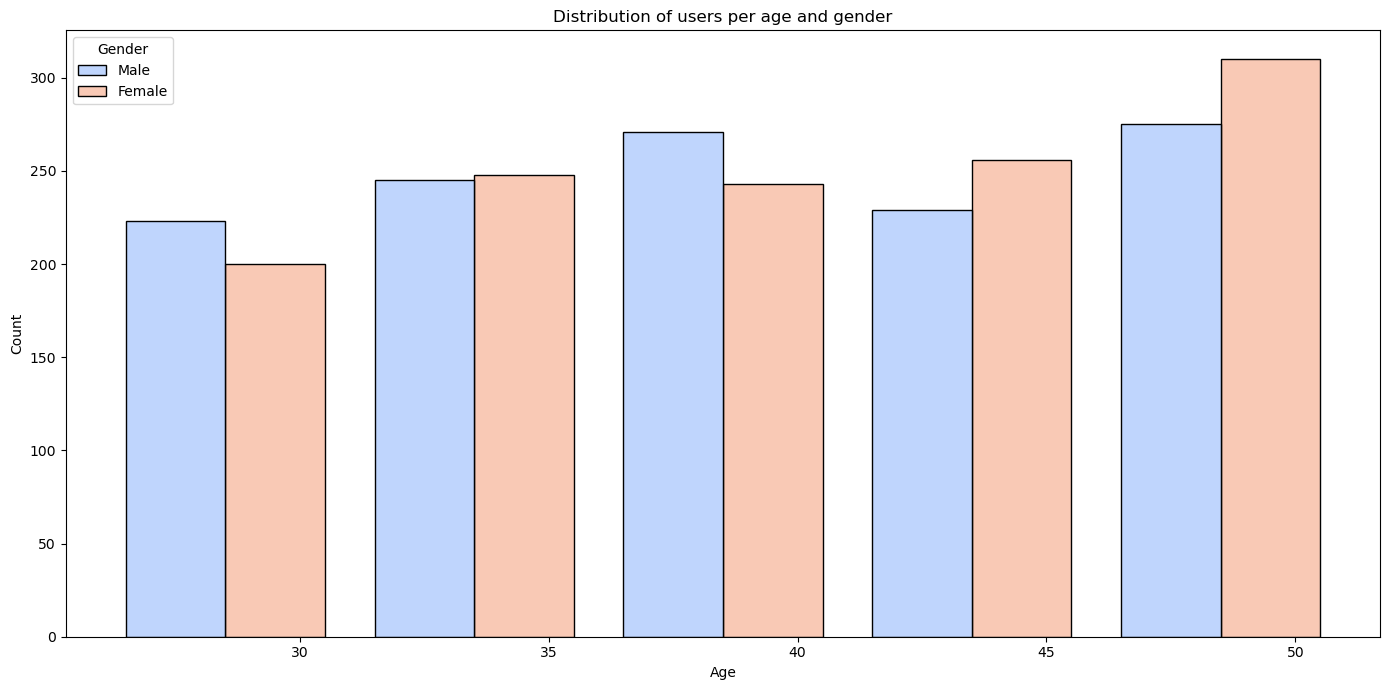

In [17]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='Age',binwidth=5, hue='Gender', palette='coolwarm', multiple='dodge', shrink=.8)
plt.title('Distribution of users per age and gender')
plt.tight_layout()

Looking at the charts we can see that Netflix userbase is spread worldwide, with countries like USA, Spain and Canada being at the core by the number of consumers. The userbase is comprised by both men and women equally, with ages ranging from mid 20s to early 50s, showcasing the almost universal appeal of Netflix. 

A thing to notice is that in the younger userbase (up to 40 years old), men are more numerous than women, while in the over 40 years old group, women are more present than men.

**Part 2: Netflix Userbase Habits**

A glance at how people use Netflix, ploted from different perspectives:  
  
What's the most used device for streaming?   
Are there differences between women and men when it comes to which device they use for watching their favorite show?  
What is the most popular Netflix plan around the world? How about in each country?  
How long does a client sticks with Netflix?

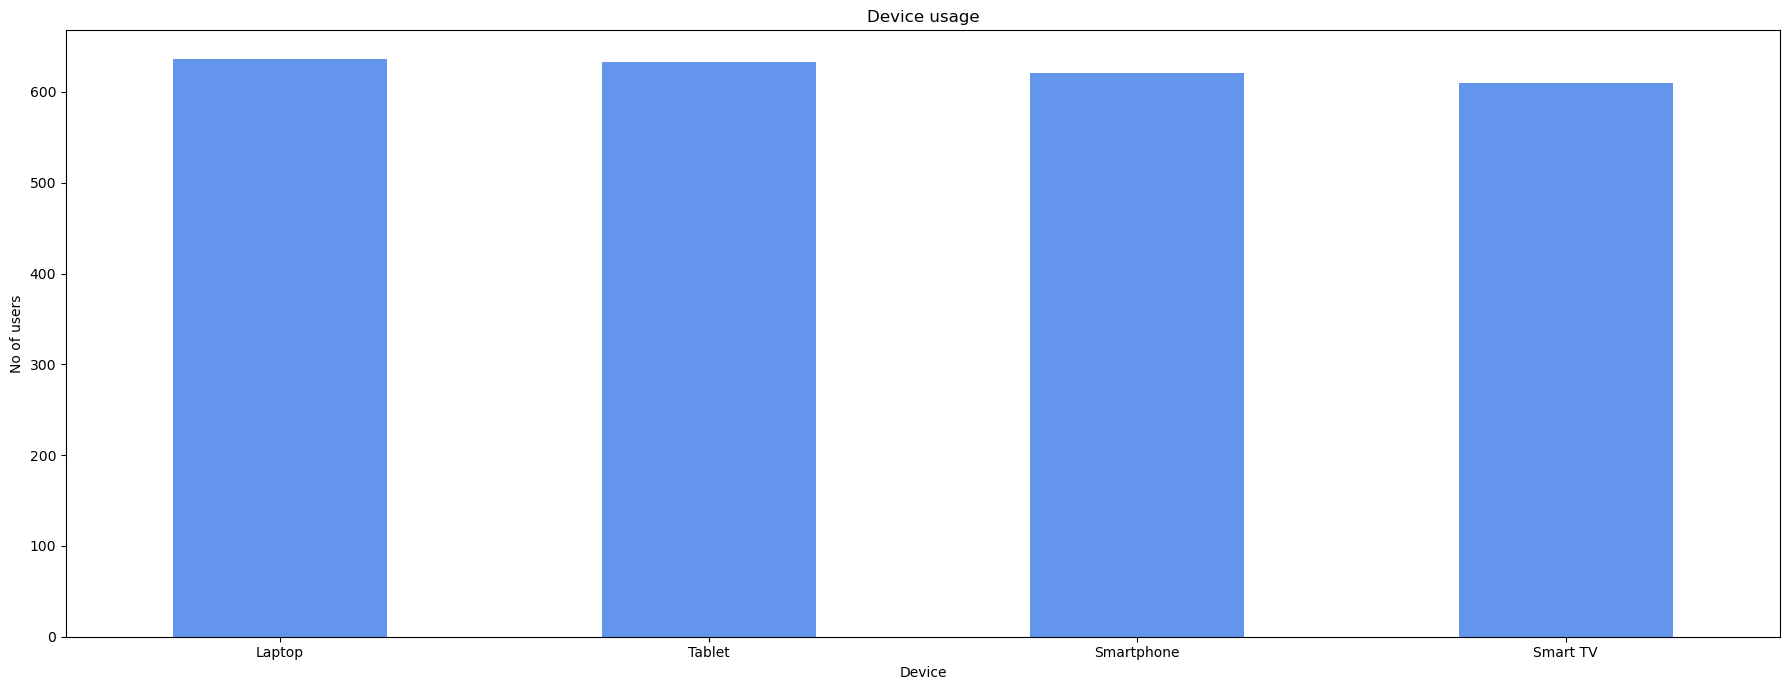

In [18]:
df['Device'].value_counts().plot(kind='bar', title ='Device usage', xlabel='Device', ylabel='No of users', color='cornflowerblue', figsize = (18, 7),rot=0)
plt.tight_layout()

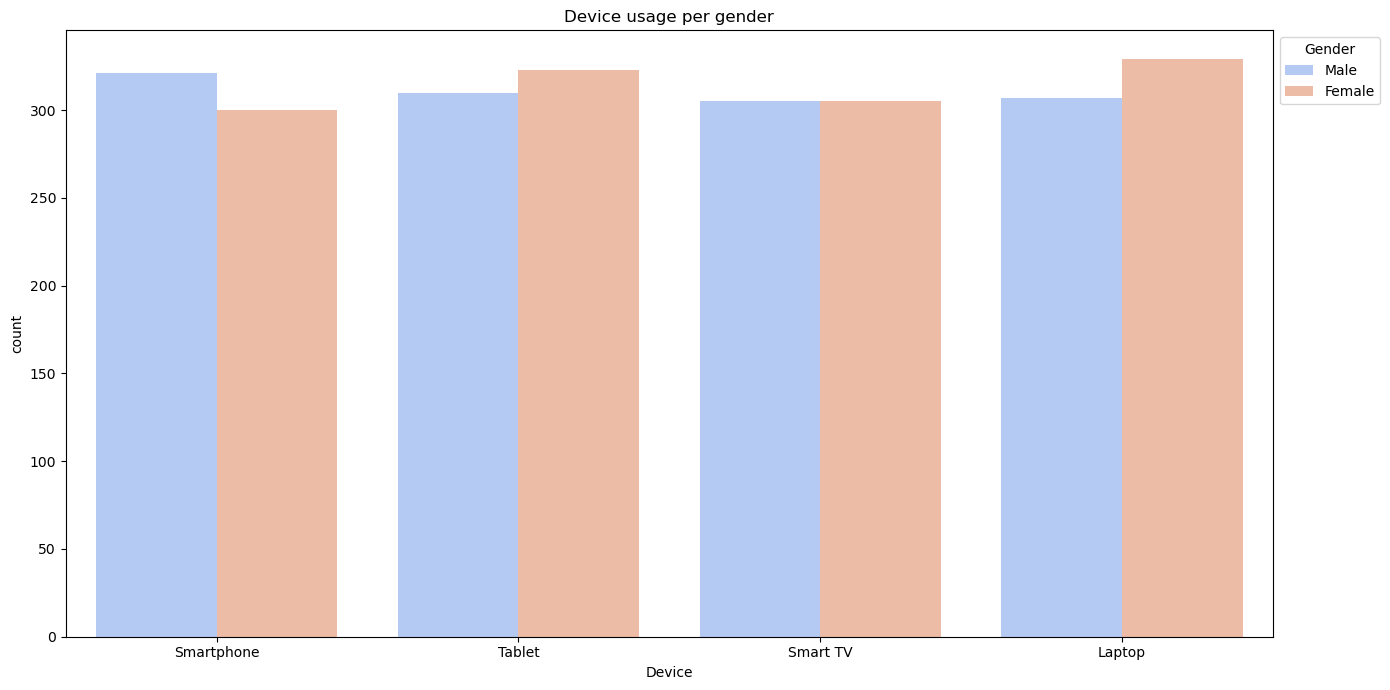

In [19]:
plt.figure(figsize=(14,7))
plt.title("Device usage per gender")
count_plot1 = sns.countplot(x=df["Device"], hue =df["Gender"], palette='coolwarm')
sns.move_legend(count_plot1, "upper left", bbox_to_anchor= (1,1))
plt.tight_layout()

In [20]:
df_pie_1 = df[['Subscription Type']].groupby('Subscription Type', as_index=False).value_counts()

px.pie(data_frame=df_pie_1, names='Subscription Type', values='count', title='Distribution of Netflix plans')

In [21]:
df_pie_2 = df[['Country', 'Subscription Type']].groupby(['Country', 'Subscription Type'], as_index=False).value_counts()
px.sunburst(df_pie_2, path=[ 'Country', 'Subscription Type'], values='count', title='Distribution of Netflix plans per country')


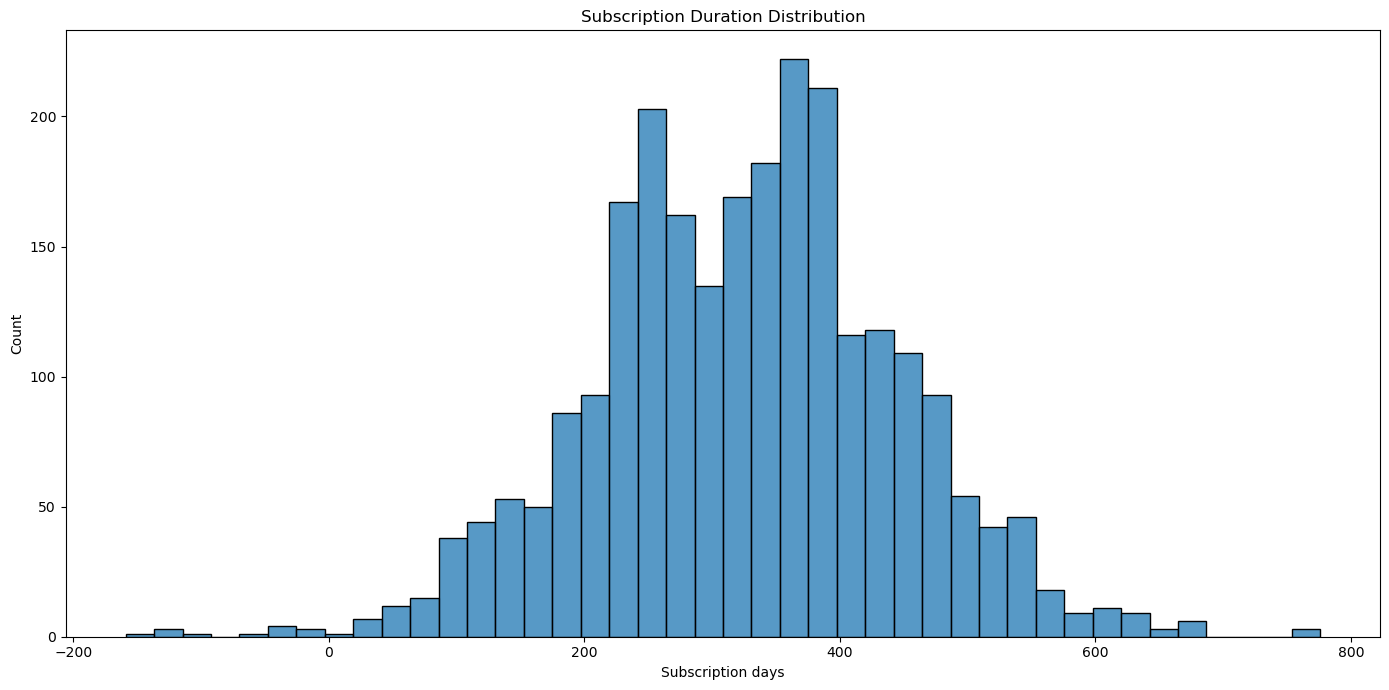

In [22]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])
df['Subscription days'] =  df['Last Payment Date'] - df['Join Date']
plt.figure(figsize=(14,7))
sns.histplot(data=df, x=df['Subscription days'].dt.days)
plt.title('Subscription Duration Distribution')
plt.tight_layout()


From a macro perspective, Netflix users seem to watch netflix on whichever device is available, whether it's a smartphone, a Smart TV, a Laptop or a Tablet. Looking a bit closer, we can see that that more men use a smartphones for streaming than women, and more women use laptops than men. When it comes to how long people stick with Netlifx, we can see that most users cancel their subscription withing 7.5 months and 13 months.

**Part 3 - Netflix userbase from a business view**  

A look on how do the choices made by customers impact Netflix from a business point a view.

In [23]:
# Average Churn Rate 
#A client is considered churned if they cancel their subscription in the first 30, 60 and 90 days since joining Netflix)
Churned_30days = ((df['Last Payment Date'] - df['Join Date']).dt.days  <= 30).mean()
Churned_60days = ((df['Last Payment Date'] - df['Join Date']).dt.days  <= 60).mean()
Churned_90days = ((df['Last Payment Date'] - df['Join Date']).dt.days  <= 90).mean()

print(f'The average churn rate 30 days is: {Churned_30days}')
print(f'The average churn rate 60 days is: {Churned_60days}')
print(f'The average churn rate 90 days is: {Churned_90days}')

The average churn rate 30 days is: 0.0072
The average churn rate 60 days is: 0.0116
The average churn rate 90 days is: 0.024


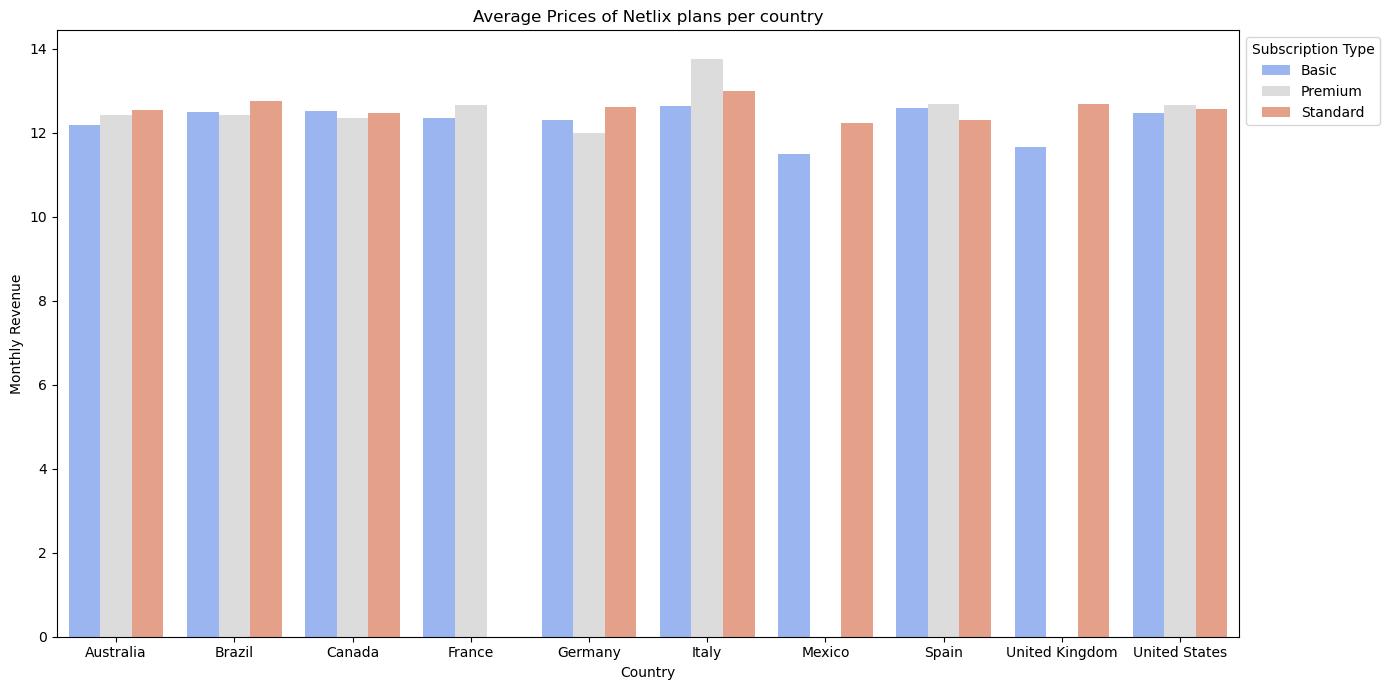

In [24]:
df_avg_rev = df.groupby(['Country', 'Subscription Type'], as_index=False).agg({'Monthly Revenue': 'mean'}).round(2)

plt.figure(figsize=(14,7))
plt.title("Average Prices of Netlix plans per country")
bar_plot2 = sns.barplot(x = df_avg_rev['Country'],
            y = df_avg_rev["Monthly Revenue"],
            hue =df_avg_rev["Subscription Type"],
             palette = "coolwarm")
sns.move_legend(bar_plot2, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

Looking at the above chart as well as to the _"Distribution of Netflix plans per country"_ chart, we notice that the Countries in South Europe are more budget conscious. In Italy, the difference between the average price of Basic Plan and Premium plan is pretty steep and as a result most users go for the basic plan. In Spain and France, the difference between basic plan and the premium plans are not as big and as a result, people are willing to go with the top tier plan.

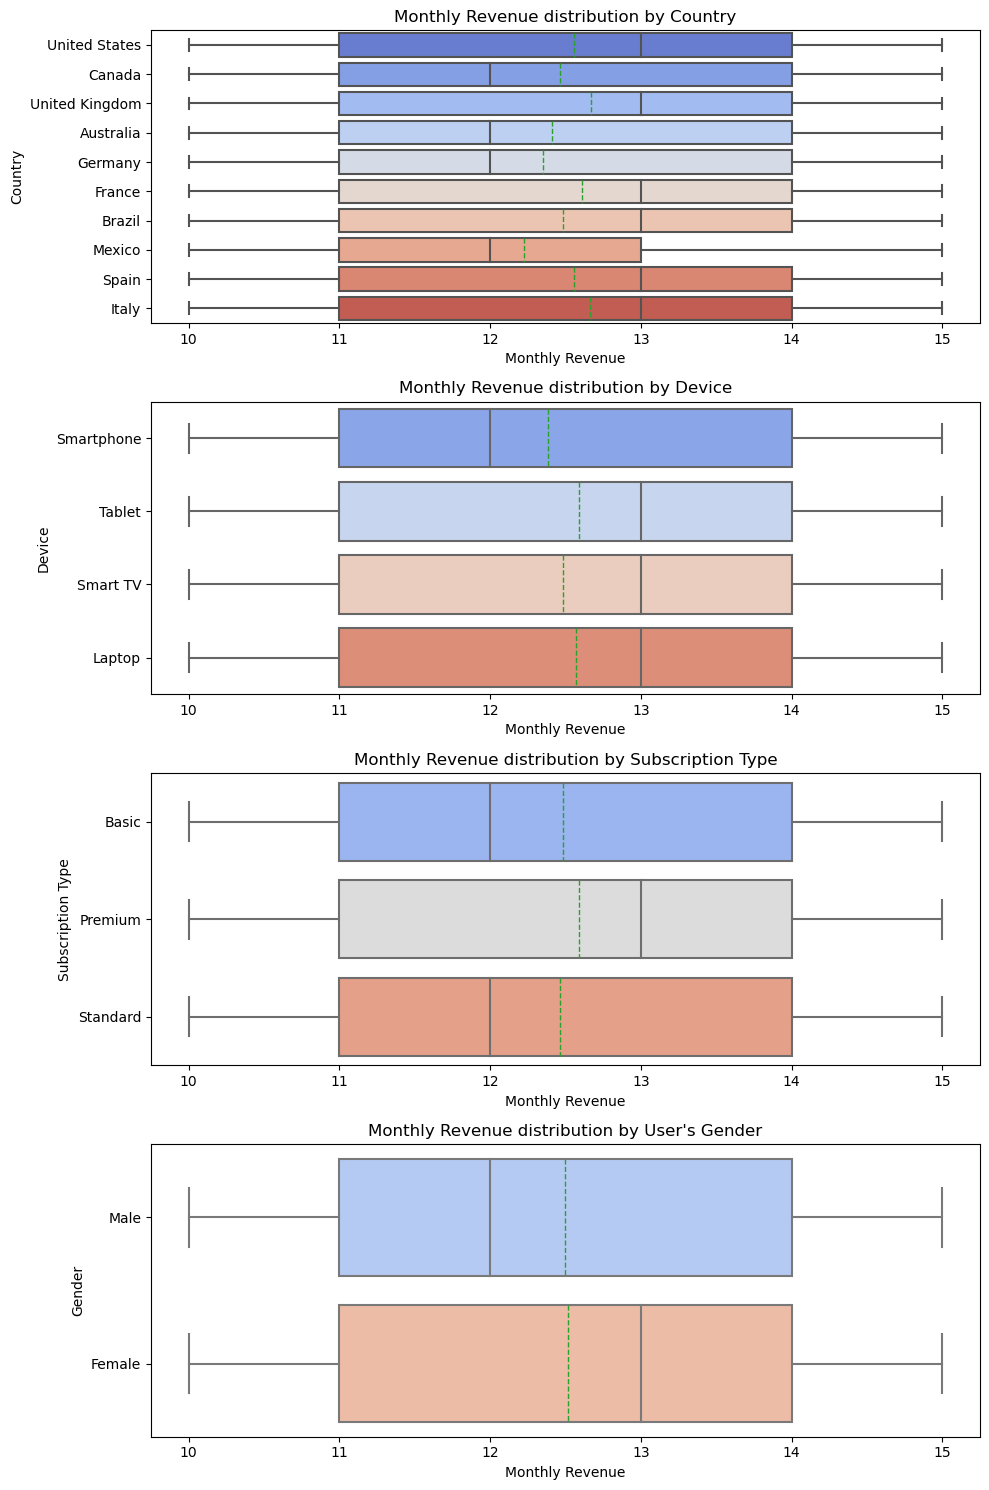

In [25]:
#Revenues per user
fig, ax = plt.subplots(4,1,figsize=(10,15))

sns.boxplot(data=df, x='Monthly Revenue', y='Country', ax=ax[0], palette= 'coolwarm',showmeans=True, meanline=True)
ax[0].set_title('Monthly Revenue distribution by Country')

sns.boxplot(data=df, x='Monthly Revenue', y='Device', ax=ax[1], palette= 'coolwarm', showmeans=True, meanline=True)
ax[1].set_title('Monthly Revenue distribution by Device')

sns.boxplot(data=df, x='Monthly Revenue', y='Subscription Type', ax=ax[2], palette= 'coolwarm',showmeans=True, meanline=True)
ax[2].set_title('Monthly Revenue distribution by Subscription Type')

sns.boxplot(data=df, x='Monthly Revenue', y='Gender', ax=ax[3], palette= 'coolwarm', showmeans=True, meanline=True)
ax[3].set_title("Monthly Revenue distribution by User's Gender")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Netflix revenue per user and gender')

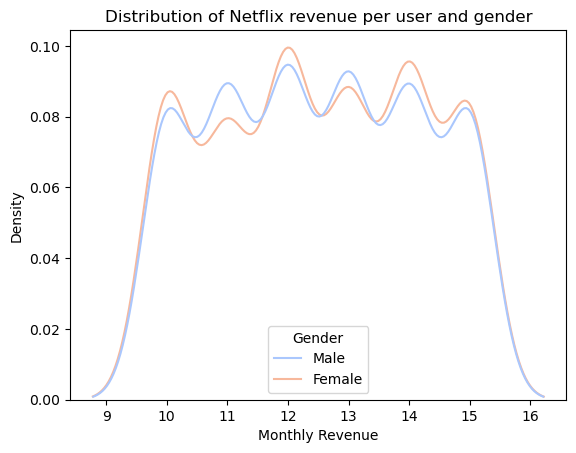

In [26]:
sns.kdeplot(data = df, x= df['Monthly Revenue'], hue=df['Gender'], palette='coolwarm')
plt.title('Distribution of Netflix revenue per user and gender')

Looking at the revenues we notice that on average, the type of device does not impact revenue in any meaningful way. However, when we look at the type we do notice, as expected, that the premium plan brings in the most revenue. Diving in, we can see that that while on average men and women bring in the same monthly revenue, median of monthly revenue for women is higher than for man. This happens because there are significantly more men bringing in revenues of around 11 dollars than women, and more women bringing in monthly revenues of around 14 dollars than men.

**Netflix Userbase - Overview**

Taking a step back and looking at the Netflix userbase, we notice that the Streaming giant has a global presence, equally appealing to both men and women. Furthermore, the age range the userbase emphasis this general appeal of Netflix, with customers being in their mid 20's and early 50's. From a business point of view, this is important because people in this age range are the most financially productive, and cand withstand a price increase if the economics of the business demands it. 

On top of the general appeal, Netflix has a good degree of stickiness, with a churn rate measured within the first 30 days of enrollement of just 0.72% and an average subscription length of 326 days - roughly 11 months. 

When it comes to plans the one with highest revenue turnover per user, naturally, the premium one takes the first place. 
However, the other plans - the basic and the standard, are not more important because they provide Netflix with market share, given the fact that they are the most popular plans to company offers(40% of users have a Basic account, while 30.7% have a Standard account).

